<a href="https://colab.research.google.com/github/davidest1995/personal_projects/blob/main/Reto_sura_prueba_t%C3%A9cnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se importaron las librerías necesarias para el respectivo analisis y desarrollo.
#Aparte se actualizó el matplotlib.

%pip install matplotlib --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Se importó la base de datos suministrada por la empresa y se organizó en forma de tabla
data = pd.read_csv('/content/BASE_PF.txt', sep= ';')
data.head(5)

,Fecha,Empresa,Moneda,Ingreso
0,01/01/2017,Empresa A,EURO,0.000137
1,01/02/2017,Empresa A,EURO,0.001744
2,01/03/2017,Empresa A,EURO,0.126475
3,01/04/2017,Empresa A,EURO,0.000118
4,01/05/2017,Empresa A,EURO,0.000000


In [ ]:
# Se visualizaron los 10 últimos datos de la tabla para ver el final de la fecha, 
#la cantidad de datos y poder entender otra parte de la info como los ingresos negativos
data.tail(10)

,Fecha,Empresa,Moneda,Ingreso
3373,30/10/2017,Empresa C,USD,0.037838
3374,30/11/2017,Empresa C,USD,-0.027729
3375,30/12/2017,Empresa C,USD,0.007518
3376,31/01/2017,Empresa C,USD,0.149561
3377,31/03/2017,Empresa C,USD,0.011882
3378,31/05/2017,Empresa C,USD,0.010498
3379,31/07/2017,Empresa C,USD,-0.013038
3380,31/08/2017,Empresa C,USD,-0.050326
3381,31/10/2017,Empresa C,USD,-0.253159
3382,31/12/2017,Empresa C,USD,0.005604


In [ ]:
# En este caso se puede visualizar la cantidad de variables diferentes por columna de la tabla, 
#algo a resaltar es que en empresa deberían haber 3 (empresa A,B,C)
# respectivamente, pero se registran 4
data.nunique()

Fecha       365
Empresa       4
Moneda        3
Ingreso    3333
dtype: int64

In [ ]:
# Aquí podemos observar el primer error de la data, la Empresa C y EmpresaC deberían contar como un único dato.
data['Empresa'].value_counts()

Empresa A    1095
Empesa B     1095
Empresa C    1095
EmpresaC       98
Name: Empresa, dtype: int64

In [ ]:
# Se reemplarará el nombre por Empresa C, para mantener el orden de la tabla.
data["Empresa"].replace(["EmpresaC"],["Empresa C"], inplace = True)


In [ ]:
# Revisamos si el comando fue aplicado correctamente.
data['Empresa'].value_counts()

Empresa C    1193
Empresa A    1095
Empesa B     1095
Name: Empresa, dtype: int64

In [ ]:
#El objetivo de este comando es ver que tipo de variables se tienen, 
#la fecha está tipo object y se requiere tipo datetime para trabajar de forma más eficiente con ella
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    3383 non-null   object 
 1   Empresa  3383 non-null   object 
 2   Moneda   3383 non-null   object 
 3   Ingreso  3383 non-null   float64
dtypes: float64(1), object(3)
memory usage: 105.8+ KB


In [ ]:
# Se cambia el tipo de variable fecha por datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format ='%d/%m/%Y')

In [ ]:
# Revisamos que los cambios estén ejecutados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    3383 non-null   datetime64[ns]
 1   Empresa  3383 non-null   object        
 2   Moneda   3383 non-null   object        
 3   Ingreso  3383 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 105.8+ KB


In [ ]:
# Ordenamos la tabla por fecha para identificar cual es el dato más antiguo
data.sort_values('Fecha')

,Fecha,Empresa,Moneda,Ingreso
0,2017-01-01,Empresa A,EURO,0.000137
1923,2017-01-01,Empresa C,PESO,363.767596
2653,2017-01-01,Empesa B,USD,0.019798
1095,2017-01-01,Empresa A,PESO,183.766913
3018,2017-01-01,Empresa C,USD,0.007048
...,...,...,...,...
1094,2017-12-31,Empresa C,EURO,0.000051
1824,2017-12-31,Empesa B,PESO,802.453354
2652,2017-12-31,Empresa A,USD,0.010433
1922,2017-12-31,Empresa C,PESO,12.038793


In [ ]:
# En estas líneas de código se hará un filtrado por el més de junio
data_junio = data[(data['Fecha'] >= '2017-06-01') & (data['Fecha'] <= '2017-06-30')].sort_values('Fecha')
data_junio

,Fecha,Empresa,Moneda,Ingreso
5,2017-06-01,Empresa A,EURO,0.026922
3023,2017-06-01,Empresa C,USD,0.283001
2658,2017-06-01,Empesa B,USD,0.788619
1100,2017-06-01,Empresa A,PESO,644.286407
370,2017-06-01,Empesa B,EURO,0.025240
...,...,...,...,...
1811,2017-06-30,Empesa B,PESO,1747.906862
1081,2017-06-30,Empresa C,EURO,-0.014321
2274,2017-06-30,Empresa C,PESO,896.073361
1446,2017-06-30,Empresa A,PESO,491.049405


In [ ]:
# Identifique la compañía con mayor ingreso en dólares en el mes de junio

data_USD = data_junio[data_junio["Moneda"]=="USD"].groupby("Empresa").sum()
data_USD.reset_index(inplace=True)

data_USD

,Empresa,Ingreso
0,Empesa B,-2.664487
1,Empresa A,-2.231755
2,Empresa C,-0.944174


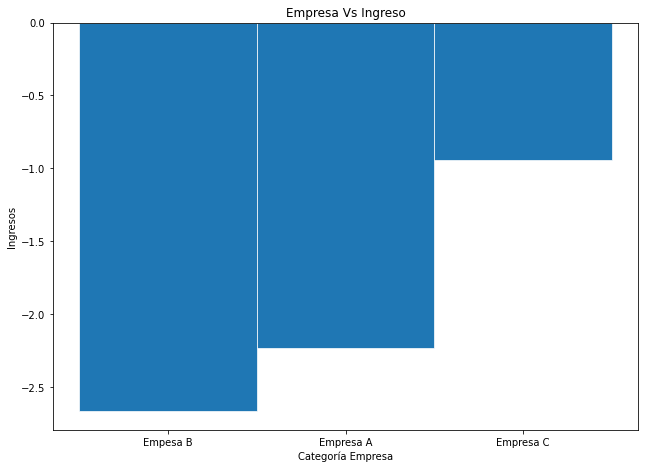

In [ ]:
# Esta gráfica nos muestra los ingresos por empresa, todas las empresas están en pérdida,
# lo que significa que el mayor ingreso lo tiene la empresa con menos pérdidas.
# En este caso la Empresa C

fig, ax = plt.subplots()
fig.set_size_inches(10.5,7.5)

ax.bar(data_USD['Empresa'],data_USD['Ingreso'], width=1, edgecolor= "white", linewidth = 0.7)

plt.xlabel("Categoría Empresa")
plt.ylabel("Ingresos")
plt.title("Empresa Vs Ingreso")

plt.show()

In [ ]:
# Ingreso total de la empresa C

data_C = data[(data['Empresa'] == 'Empresa C') & (data['Moneda'] == 'EURO')].groupby('Moneda').sum()

data_C

,Ingreso
Moneda,
EURO,0.348963


In [ ]:
# Totalizar el ingreso por compañía y tipo de moneda

ingreso_compania_moneda = pd.pivot_table(data ,values = "Ingreso", index="Moneda", columns="Empresa", aggfunc='sum')
ingreso_compania_moneda


Empresa,Empesa B,Empresa A,Empresa C
Moneda,,,
EURO,1.062542,0.575022,0.348963
PESO,327243.320826,71668.069524,142738.036001
USD,15.723750,9.864023,6.221502


In [ ]:
# En este resultado logramos ver el ingreso de las tres empresas en Euros, es decir la primer fila de anterior tabla.
ingreso_compania_moneda.iloc[0]

Empresa
Empesa B     1.062542
Empresa A    0.575022
Empresa C    0.348963
Name: EURO, dtype: float64

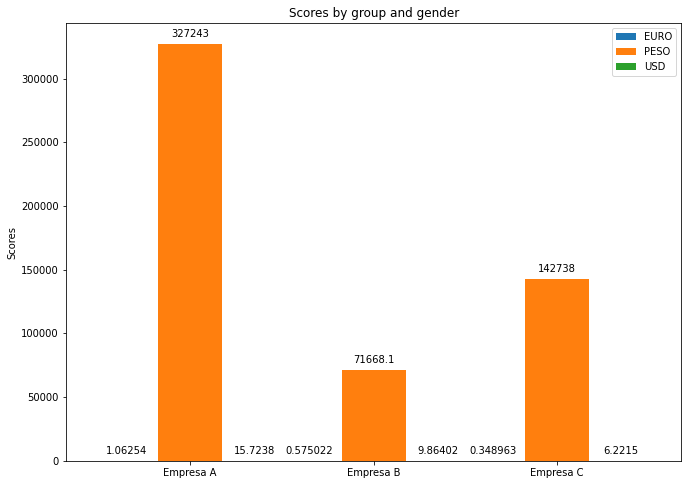

In [ ]:
# Estas líneas de código grafican  las tres monedas por empresa,
# pero como el PESO tiene valores tan altos en las tres empresas,
# el valor de EURO Y USO no se logra visualizar
# de la mejor manera, en la tabla anterior se detallan 
#los valores para las empresas respectivas y su tipo de moneda.

empresas = ['Empresa A', 'Empresa B', 'Empresa C']

x = np.arange(len(empresas))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, ingreso_compania_moneda.iloc[0], width, label='EURO')
rects2 = ax.bar(x, ingreso_compania_moneda.iloc[1], width, label='PESO')
rects3 = ax.bar(x + width, ingreso_compania_moneda.iloc[2], width, label='USD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, empresas)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)
ax.bar_label(rects3, padding=5)

fig.tight_layout()
fig.set_size_inches(10.5,7.5)

plt.show()